In [27]:

# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [28]:
IMAGE_SIZE = [224,224]

train_path = "C:/Users/Hp/Data Science/phenomonia prediction/chest_xray/train"
valid_path = "C:/Users/Hp/Data Science/phenomonia prediction/chest_xray/val"

In [29]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [30]:
# don't train existing weights

for layer in vgg.layers:
    layer.trainable = False

In [31]:
folders = glob("C:/Users/Hp/Data Science/phenomonia prediction/chest_xray/train/*")

In [32]:
x=Flatten()(vgg.output)

In [33]:
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = prediction)

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [35]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

In [37]:
# Use the Image Data Generator to import the images from the dataset

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,
                                  shear_range= 0.2,
                                  zoom_range= 0.2,
                                  horizontal_flip = True)

test_data_gen = ImageDataGenerator(rescale= 1./255)

In [38]:

# Make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory("C:/Users/Hp/Data Science/phenomonia prediction/chest_xray/train",
                                                target_size=(224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')


Found 5216 images belonging to 2 classes.


In [39]:
test_set = test_data_gen.flow_from_directory("C:/Users/Hp/Data Science/phenomonia prediction/chest_xray/test",
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode='categorical')

Found 624 images belonging to 2 classes.


In [41]:


r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch = len(training_set),
    validation_steps= len(test_set)

)

C:\Users\Hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 1437s 9s/step - loss: 0.3986 - accuracy: 0.8661 - val_loss: 0.3036 - val_accuracy: 0.8958
Epoch 2/5
163/163 [==============================] - 1378s 8s/step - loss: 0.1030 - accuracy: 0.9611 - val_loss: 0.2691 - val_accuracy: 0.9119
Epoch 3/5
163/163 [==============================] - 1262s 8s/step - loss: 0.0887 - accuracy: 0.9677 - val_loss: 0.2716 - val_accuracy: 0.9071
Epoch 4/5
163/163 [==============================] - 1129s 7s/step - loss: 0.1495 - accuracy: 0.9440 - val_loss: 0.4479 - val_accuracy: 0.8910
Epoch 5/5
163/163 [==============================] - 1173s 7s/step - loss: 0.0874 - accuracy: 0.9722 - val_loss: 0.2715 - val_accuracy: 0.9215


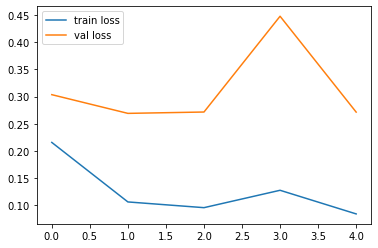

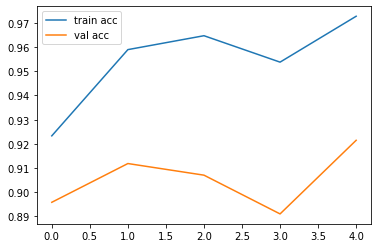

<Figure size 432x288 with 0 Axes>

In [44]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [45]:
import tensorflow as tf
from keras.models import load_model
model.save('lung disease prediction model - vgg16.h5')

In [46]:

# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3